# Data Transformation - Power transforms

## 0. Introductions

This notebook contains:
  1. Sonar dataset
  2. Box-Cox transform
  3. Yeo-Johnson transform

## 1. Sonar dataset

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, PowerTransformer, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

In [3]:
path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
data = pd.read_csv(path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
y = LabelEncoder().fit_transform(y)

In [7]:
model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, error_score='raise')
print(f"Accuracy: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})")

Accuracy: 0.805 (0.083)


## 2. Box-Cox transform

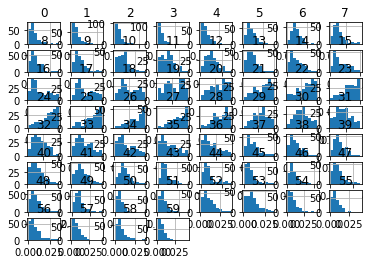

In [8]:
data = pd.read_csv(path, header=None)
data.hist()
plt.show()

In [14]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
y = LabelEncoder().fit_transform(y)

In [16]:
scaler = MinMaxScaler(feature_range=(1,2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('s', scaler),
    ('p', power),
    ('m', model)
])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(f"Accuracy: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})")

Accuracy: 0.819 (0.104)


## 3. Yeo-Johnson Transform

In [17]:
data = pd.read_csv(path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [18]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
y = LabelEncoder().fit_transform(y)

In [21]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('s', scaler),
    ('p', power),
    ('m', model)
])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(f"Accuracy: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})")

Accuracy: 0.819 (0.105)
